In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import scipy
import sklearn
import tensorflow as tf
import torch


In [ ]:
# Load dataset from a CSV file
df = pd.read_csv('/content/iot_sensor_dataset.csv')

In [ ]:
# Perform Preprocessing
df.fillna(df.mean(), inplace=True)

In [ ]:
df

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,Unnamed: 9
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [ ]:
from sklearn.preprocessing import StandardScaler

#  Scale numerical features using StandardScaler
scaler = StandardScaler()
df[['footfall', 'outpressure','inpressure','temp']] = scaler.fit_transform(df[['footfall', 'outpressure','inpressure','temp']])


In [ ]:
#Feature election Based on Correlation
correlation_matrix = df.corr()
relevant_features = correlation_matrix[correlation_matrix > 0.5].index.tolist()
df = df[relevant_features]
print(relevant_features)

['footfall', 'atemp', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'outpressure', 'inpressure', 'temp', 'Unnamed: 9']


In [ ]:
df

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,Unnamed: 9
0,-0.283153,7,7,1,6,6,-0.672788,-0.979504,-2.567407,1
1,-0.107558,1,3,3,5,1,-1.647540,-0.353894,-2.567407,0
2,-0.254504,7,2,2,6,1,-1.403852,0.897327,-2.567407,0
3,-0.206446,4,3,4,5,1,-1.160164,0.897327,-2.567407,0
4,0.308326,7,5,6,4,0,1.276716,0.897327,-2.567407,0
...,...,...,...,...,...,...,...,...,...,...
939,-0.283153,7,7,1,6,4,1.581326,0.897327,1.284147,1
940,-0.283153,7,5,2,6,6,0.180120,0.897327,1.284147,1
941,-0.283153,3,6,2,7,5,-0.246334,0.897327,1.284147,1
942,-0.283153,6,6,2,5,6,-0.063568,1.522937,1.284147,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# Split the dataset into training and test sets (75% - 25% ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
X_train

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp
584,-0.283153,5,4,6,5,2,0.241042,-0.979504,0.614312
298,0.021828,2,4,5,5,1,-0.246334,0.271716,-0.222983
828,-0.280381,7,2,4,3,6,-0.855554,0.897327,0.949229
328,0.548614,2,6,5,3,1,-1.342930,-0.979504,-0.222983
204,-0.015139,0,6,3,6,5,-0.733710,-0.353894,-0.725359
...,...,...,...,...,...,...,...,...,...
106,0.077279,7,4,5,3,1,-0.246334,-0.979504,-1.562654
270,-0.256352,1,5,2,4,2,-1.342930,0.271716,-0.390442
860,-0.261897,5,6,3,6,6,0.119198,0.897327,1.116688
435,-0.181493,7,4,2,6,4,1.764092,-0.353894,0.111935


In [ ]:
y_train

584    0
298    0
828    1
328    0
204    1
      ..
106    0
270    0
860    1
435    1
102    0
Name: Unnamed: 9, Length: 708, dtype: int64

Accuracy: 0.8771186440677966
Precision: 0.8378378378378378
Recall: 0.8942307692307693
F1-score: 0.8651162790697674


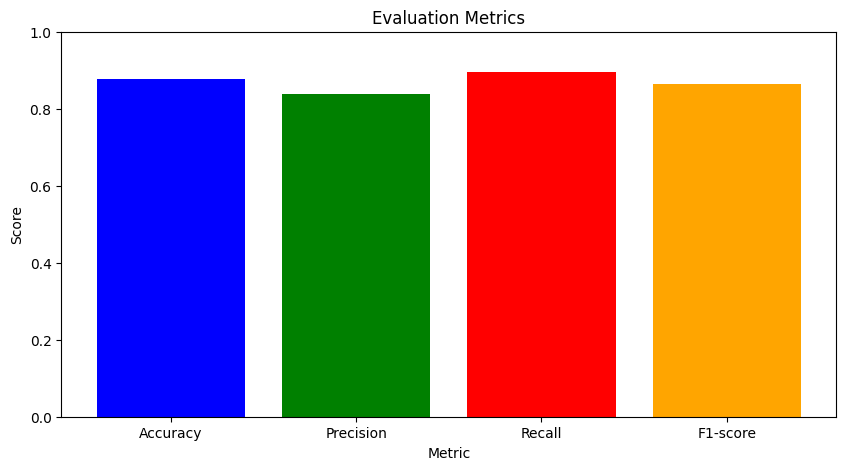

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)

# Plot the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [lr_accuracy, lr_precision, lr_recall, lr_f1]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.show()


Accuracy: 0.8347457627118644
Precision: 0.7927927927927928
Recall: 0.8461538461538461
F1-score: 0.8186046511627907


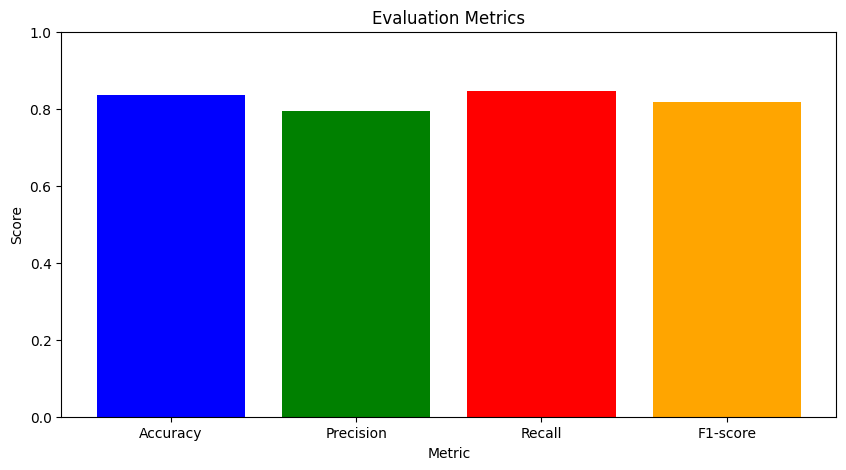

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

# Print the metric values
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)

# Plot the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [dt_accuracy, dt_precision, dt_recall, dt_f1]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.show()


Accuracy: 0.885593220338983
Precision: 0.8532110091743119
Recall: 0.8942307692307693
F1-score: 0.8732394366197184


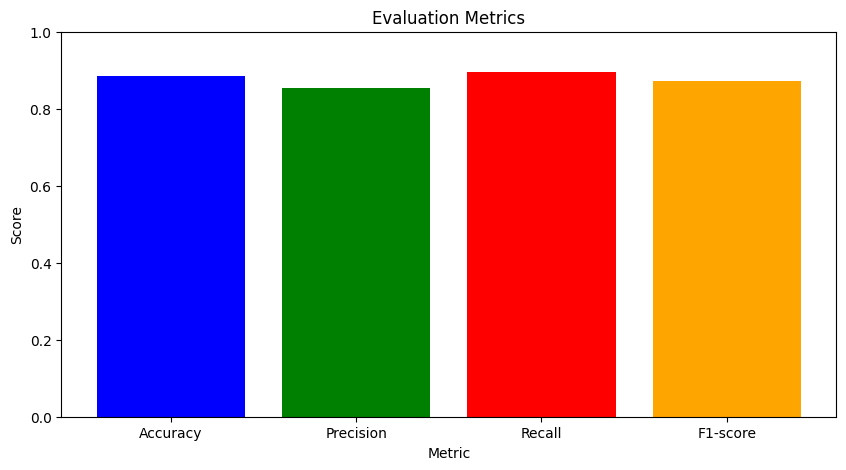

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Create a Random Forest model
model = RandomForestClassifier()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

# Print the metric values
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

# Plot the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [rf_accuracy, rf_precision, rf_recall, rf_f1]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.show()


Accuracy: 0.885593220338983
Precision: 0.8468468468468469
Recall: 0.9038461538461539
F1-score: 0.8744186046511627


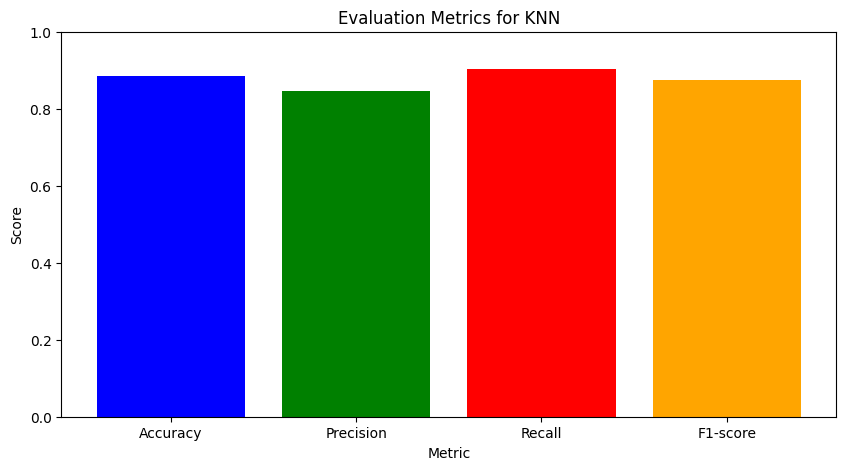

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Create a KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors (you can adjust this parameter)

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

# Print the metric values
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)

# Plot the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [knn_accuracy, knn_precision, knn_recall, knn_f1]

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Evaluation Metrics for KNN')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.show()


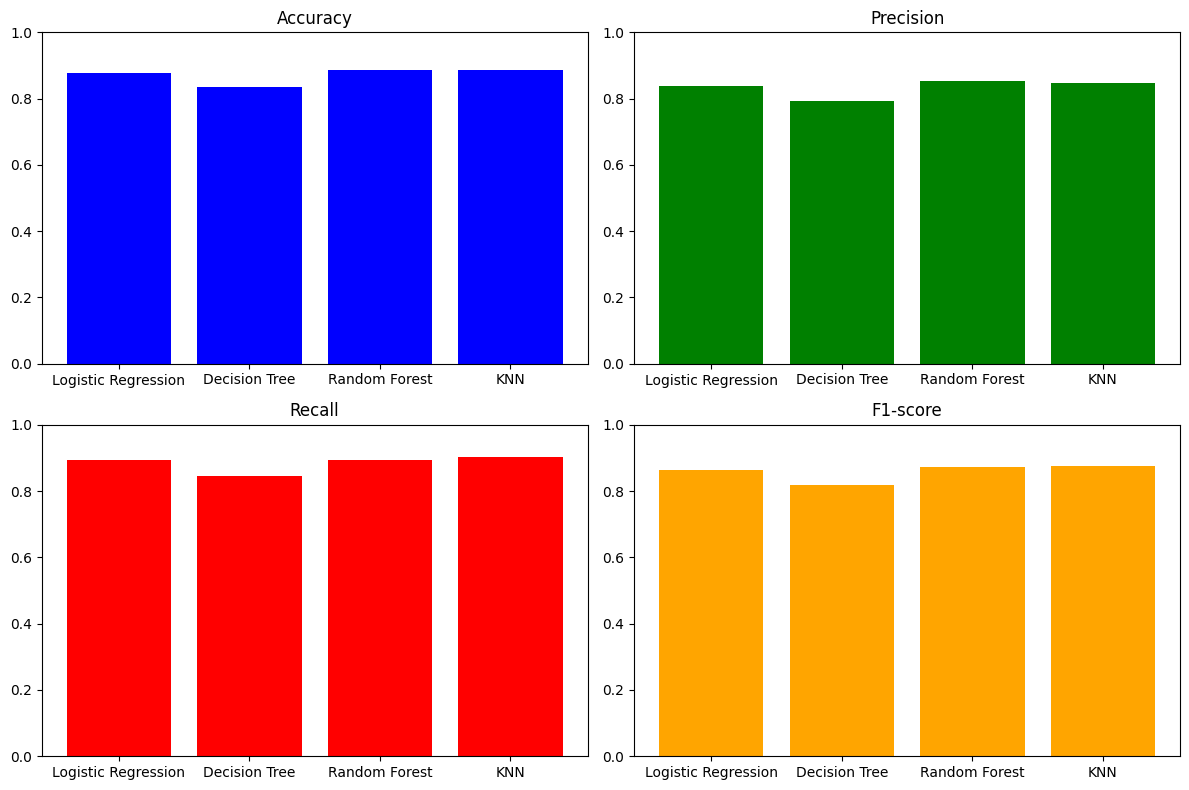

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy, knn_accuracy]
precisions = [lr_precision, dt_precision, rf_precision, knn_precision]
recalls = [lr_recall, dt_recall, rf_recall, knn_recall]
f1_scores = [lr_f1, dt_f1, rf_f1, knn_f1]

# Plot the metrics for each model
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].bar(models, accuracies, color='blue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

axes[0, 1].bar(models, precisions, color='green')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

axes[1, 0].bar(models, recalls, color='red')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)

axes[1, 1].bar(models, f1_scores, color='orange')
axes[1, 1].set_title('F1-score')
axes[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [ ]:
# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
accuracies = [lr_accuracy, dt_accuracy, rf_accuracy, knn_accuracy]
precisions = [lr_precision, dt_precision, rf_precision, knn_precision]
recalls = [lr_recall, dt_recall, rf_recall, knn_recall]
f1_scores = [lr_f1, dt_f1, rf_f1, knn_f1]

# Calculate the average F1-score for each model
average_f1_scores = [(f1_scores[i] + recalls[i]) / 2 for i in range(len(models))]

# Find the index of the model with the highest average F1-score
best_model_index = average_f1_scores.index(max(average_f1_scores))

# Print the best model
print("Best Model:", models[best_model_index])
print("Average F1-score:", average_f1_scores[best_model_index])


Best Model: KNN
Average F1-score: 0.8891323792486583


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the individual classifiers
logistic_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', logistic_clf),
        ('dt', dt_clf),
        ('rf', rf_clf),
        ('knn', knn_clf)
    ],
    voting='hard'  # 'hard' voting predicts the class with the most votes
)

# Train the Voting Classifier using the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Calculate evaluation metrics for the ensemble model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metric values
print("Ensemble Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Ensemble Model Metrics:
Accuracy: 0.885593220338983
Precision: 0.8532110091743119
Recall: 0.8942307692307693
F1-score: 0.8732394366197184


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base models
base_models = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # You can adjust the number of neighbors
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_classifier
)

# Train the Stacking Classifier using the training data
stacking_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Calculate evaluation metrics for the stacking model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metric values
print("Stacking Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Stacking Model Metrics:
Accuracy: 0.8771186440677966
Precision: 0.8440366972477065
Recall: 0.8846153846153846
F1-score: 0.863849765258216


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train the model using the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics for the Gradient Boosting model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metric values
print("Gradient Boosting Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Gradient Boosting Model Metrics:
Accuracy: 0.8898305084745762
Precision: 0.8679245283018868
Recall: 0.8846153846153846
F1-score: 0.8761904761904762


In [ ]:
''' Out of all the Trained Models - KNN is chosen for my Classification task since it provides
better evaluation metrics '''
''' Now the KNN model is imported in Flask to make predictions on real time (new data) in VS Code '''

' Out of all the Trained Models - KNN is chosen for my Classification task since it provides \nbetter evaluation metrics '